In [1]:
import pandas as pd


In [24]:
df = pd.read_csv('贵州茅台.csv', encoding='utf-8', usecols=['Trddt', 'Opnprc', 'Hiprc',
                                                        'Loprc', 'Clsprc', 'Dnshrtrd',
                                                        'Dnvaltrd', 'Dsmvosd', 'Dsmvtll',
                                                        'Dretwd', 'Dretnd', 'Adjprcwd',
                                                        'Adjprcnd'])

print(df.head(4).T)

                      0             1              2              3
Trddt        2019-12-17    2019-12-18     2019-12-19     2019-12-20
Opnprc           1149.7        1174.0         1163.0        1162.18
Hiprc            1173.6        1175.2         1163.0        1162.18
Loprc           1143.03        1164.0         1152.0         1141.5
Clsprc          1169.98        1168.0         1157.4         1146.3
Dnshrtrd        4261696       1964009        1955230        2356384
Dnvaltrd   4937041950.0  2295963803.0   2262598597.0   2703612358.0
Dsmvosd   1469726302.04  1467239030.4  1453923333.72  1439979538.14
Dsmvtll   1469726302.04  1467239030.4  1453923333.72  1439979538.14
Dretwd         0.019217     -0.001692      -0.009075       -0.00959
Dretnd         0.019217     -0.001692      -0.009075       -0.00959
Adjprcwd     8759.14516   8744.321738    8664.964024    8581.863021
Adjprcnd    6584.320386     6573.1775    6513.523663    6451.055966


In [25]:
pd_a = pd.read_csv('沪深A股.csv', encoding='utf-8')
print(pd_a.head(3).T)
a_index = pd_a['Markettype'] == 5
df_a = pd_a[a_index]
print(df_a.head(3).T)
df_a.drop(['Markettype'], axis=1, inplace=True)

                        0                1                    2
Markettype             10                5                   15
Trddt          2019-12-17       2019-12-17           2019-12-17
Cnshrtrdtl       81356356      60594887369          60676243725
Cnvaltrdtl  336218145.178  591760373275.75  592096591420.927979
Cdretwdeq        0.019431         0.013201               0.0134
Cdretmdeq        0.019431         0.013194             0.013393
Cdretwdos        0.019451         0.012758             0.012778
Cdretmdos        0.019451         0.012756             0.012775
Cdretwdtl        0.020137         0.013419             0.013438
Cdretmdtl        0.020137         0.013411             0.013431
                         1                    20                   39
Markettype                5                    5                    5
Trddt            2019-12-17           2019-12-18           2019-12-19
Cnshrtrdtl      60594887369          51467667008          45300990922
Cnvaltrdtl  5917

C:\Users\86183\AppData\Local\Temp\ipykernel_20404\1297683486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a.drop(['Markettype'], axis=1, inplace=True)


In [26]:
# 将茅台的数据与A股市场的数据合并
df = df.merge(df_a, on='Trddt', how='left')
print(df.head(3).T)

                          0                    1                    2
Trddt            2019-12-17           2019-12-18           2019-12-19
Opnprc               1149.7               1174.0               1163.0
Hiprc                1173.6               1175.2               1163.0
Loprc               1143.03               1164.0               1152.0
Clsprc              1169.98               1168.0               1157.4
Dnshrtrd            4261696              1964009              1955230
Dnvaltrd       4937041950.0         2295963803.0         2262598597.0
Dsmvosd       1469726302.04         1467239030.4        1453923333.72
Dsmvtll       1469726302.04         1467239030.4        1453923333.72
Dretwd             0.019217            -0.001692            -0.009075
Dretnd             0.019217            -0.001692            -0.009075
Adjprcwd         8759.14516          8744.321738          8664.964024
Adjprcnd        6584.320386            6573.1775          6513.523663
Cnshrtrdtl      6059

In [27]:
# 设置滞后
lags = [1, 2, 3, 4, 5]  # 滞后1天、2天、3天、4天、5天的数据

# 看一下数据中的列
columns = df.columns
print(columns)
columns = columns.difference(["Trddt"])  # 去掉日期和收盘价列



# 构造滞后特征
for lag in lags:
    for col in columns:
        df[f"{col}_lag{lag}"] = df[col].shift(lag)

# 滑动窗口特征
window_sizes = [3, 5, 10]
for window in window_sizes:
    df[f"Clsprc_roll_mean_{window}"] = df["Clsprc"].shift(1).rolling(window).mean()
    df[f"Clsprc_roll_std_{window}"] = df["Clsprc"].shift(1).rolling(window).std()

# 删除NaN值（由于滞后和滑动窗口引入的）
df.dropna(inplace=True)

columns = columns.difference(["Clsprc"])  # 去掉日期和收盘价列

df.drop(columns=columns, inplace=True)  # 删除原有的当下日期数据列

# 特征与目标
features = df.columns.difference(["Trddt", "Clsprc"])
target = "Clsprc"


Index(['Trddt', 'Opnprc', 'Hiprc', 'Loprc', 'Clsprc', 'Dnshrtrd', 'Dnvaltrd',
       'Dsmvosd', 'Dsmvtll', 'Dretwd', 'Dretnd', 'Adjprcwd', 'Adjprcnd',
       'Cnshrtrdtl', 'Cnvaltrdtl', 'Cdretwdeq', 'Cdretmdeq', 'Cdretwdos',
       'Cdretmdos', 'Cdretwdtl', 'Cdretmdtl'],
      dtype='object')


C:\Users\86183\AppData\Local\Temp\ipykernel_20404\664011459.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df[col].shift(lag)
C:\Users\86183\AppData\Local\Temp\ipykernel_20404\664011459.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df[col].shift(lag)
C:\Users\86183\AppData\Local\Temp\ipykernel_20404\664011459.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [28]:
print(df.head(4).T)
print(df.columns)
print(len(features))

                              10           11           12           13
Trddt                 2019-12-31   2020-01-02   2020-01-03   2020-01-06
Clsprc                    1183.0       1130.0      1078.56      1077.99
Adjprcnd_lag1        6673.350924  6657.593306  6359.324122  6069.834181
Adjprcwd_lag1        8877.582805   8856.62039  8459.831818  8074.722306
Cdretmdeq_lag1          0.006233     0.006128     0.017167     0.005164
...                          ...          ...          ...          ...
Clsprc_roll_std_3      25.392715    12.434361    31.439042    52.221942
Clsprc_roll_mean_5       1153.12      1160.12      1159.38     1148.072
Clsprc_roll_std_5      21.758148    25.076224    26.085092    44.790422
Clsprc_roll_mean_10     1155.658      1156.96      1153.16     1145.276
Clsprc_roll_std_10     16.378681    18.073504    19.437718    30.415697

[108 rows x 4 columns]
Index(['Trddt', 'Clsprc', 'Adjprcnd_lag1', 'Adjprcwd_lag1', 'Cdretmdeq_lag1',
       'Cdretmdos_lag1', 'Cdretmdt

In [29]:
# 划分训练集和测试集
train_data = df[df["Trddt"] <= "2023-12-31"]
test_data = df[df["Trddt"] > "2023-12-31"]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]

y_test = test_data[target]

In [30]:
print(X_train.head(3).T)
X_train.to_csv('X_train.csv', index=False)
print(y_train.head(3))

                        10           11           12
Adjprcnd_lag1  6673.350924  6657.593306  6359.324122
Adjprcnd_lag2  6545.038897  6673.350924  6657.593306
Adjprcnd_lag3  6388.025496  6545.038897  6673.350924
Adjprcnd_lag4  6380.146688  6388.025496  6545.038897
Adjprcnd_lag5  6460.623090  6380.146688  6388.025496
...                    ...          ...          ...
Opnprc_lag1    1170.200000  1183.000000  1128.000000
Opnprc_lag2    1150.000000  1170.200000  1183.000000
Opnprc_lag3    1132.000000  1150.000000  1170.200000
Opnprc_lag4    1143.000000  1132.000000  1150.000000
Opnprc_lag5    1153.000000  1143.000000  1132.000000

[106 rows x 3 columns]
10    1183.00
11    1130.00
12    1078.56
Name: Clsprc, dtype: float64


In [31]:
    import optuna
    import xgboost as xgb
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    
    # 自定义目标函数
    def objective(trial):
        # XGBoost 参数空间
        param = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
            'gamma': trial.suggest_float('gamma', 0, 5),  # 控制是否后剪枝
            'lambda': trial.suggest_float('lambda', 0, 1),
            'alpha': trial.suggest_float('alpha', 0, 1),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        }
        
        # 创建 XGBoost 模型
        model = xgb.XGBRegressor(**param)
        
        # 训练模型
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        
        # 预测并评估性能
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        
        return rmse
    
    # 通过 Optuna 进行贝叶斯优化
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=30)  # 进行 50 次试验
    
    # 输出最佳参数
    print(f"Best params: {study.best_params}")
    print(f"Best RMSE: {study.best_value}")
    
    # 使用最佳参数训练模型
    best_params = study.best_params
    best_model = xgb.XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)
    
    # 评估模型性能
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"最终优化后的RMSE: {rmse}") 

[I 2024-12-18 19:34:25,543] A new study created in memory with name: no-name-2cf81627-3100-48c2-9b3e-5b0015410e6f
[I 2024-12-18 19:34:26,160] Trial 0 finished with value: 39.85578373962801 and parameters: {'max_depth': 7, 'learning_rate': 0.03181458975847301, 'subsample': 0.7580354161109278, 'colsample_bytree': 0.7907699345975292, 'n_estimators': 100, 'gamma': 0.3595147872542709, 'lambda': 0.009083840573596791, 'alpha': 0.6340985002096217, 'min_child_weight': 6, 'scale_pos_weight': 7.74518565939707}. Best is trial 0 with value: 39.85578373962801.
[I 2024-12-18 19:34:32,766] Trial 1 finished with value: 40.46019284878797 and parameters: {'max_depth': 10, 'learning_rate': 0.05598641212877385, 'subsample': 0.8104792571840821, 'colsample_bytree': 0.9163637702749072, 'n_estimators': 900, 'gamma': 0.4127289125782274, 'lambda': 0.6874291170673325, 'alpha': 0.32713783577994693, 'min_child_weight': 7, 'scale_pos_weight': 3.969577382983652}. Best is trial 0 with value: 39.85578373962801.
[I 2024

Best params: {'max_depth': 3, 'learning_rate': 0.028126778904502617, 'subsample': 0.7866324710671432, 'colsample_bytree': 0.7959265793568496, 'n_estimators': 300, 'gamma': 0.8118541461043232, 'lambda': 0.07500340826516395, 'alpha': 0.5022223620028511, 'min_child_weight': 9, 'scale_pos_weight': 3.1282403394288085}
Best RMSE: 35.11699111891616
最终优化后的RMSE: 35.11699111891616


In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 使用最优参数重新创建模型
best_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    eval_metric='rmse', 
    **study.best_params  # 替换为 Optuna 的最佳参数
)

# 用训练集训练模型
best_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 评估预测结果
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"使用最优参数的模型预测 RMSE: {rmse}")

# 输出部分预测结果对比
result_df = test_data.copy()
result_df['Predicted'] = y_pred
print(result_df[['Trddt', target, 'Predicted']].head())


使用最优参数的模型预测 RMSE: 35.11699111891616
          Trddt   Clsprc    Predicted
981  2024-01-02  1685.01  1733.994385
982  2024-01-03  1694.00  1690.357300
983  2024-01-04  1669.00  1712.705200
984  2024-01-05  1663.36  1679.447754
985  2024-01-08  1643.99  1661.819702


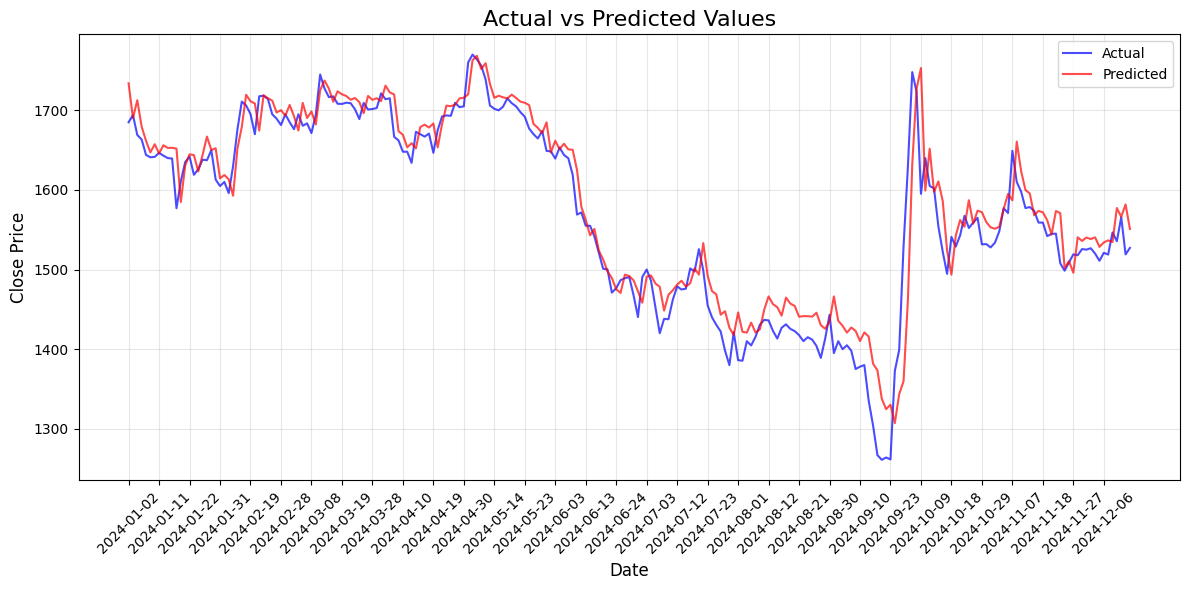

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# 创建包含预测值和真实值的 DataFrame
result_df = test_data.copy()
result_df['Predicted'] = y_pred

# 设置日期间隔（例如每7天显示一次标签）
date_interval = 7  # 每隔7天显示一个标签
dates = result_df['Trddt'][::date_interval]  # 获取间隔日期
ticks = range(0, len(result_df['Trddt']), date_interval)  # 计算间隔索引

# 绘制真实值和预测值的对比
plt.figure(figsize=(12, 6))
plt.plot(result_df['Trddt'], result_df[target], label='Actual', color='blue', alpha=0.7)
plt.plot(result_df['Trddt'], result_df['Predicted'], label='Predicted', color='red', alpha=0.7)

# 图表美化
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(ticks=ticks, labels=dates, rotation=45)  # 设置日期间隔
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# 显示图表
plt.show()


In [34]:
# 进行预测
y_pred = best_model.predict(X_test)

trade = pd.DataFrame()

trade["Trddt"] = result_df["Trddt"]
trade["Clsprc"] = result_df["Clsprc"]
trade['Predicted_Clsprc'] = y_pred


trade.reset_index(drop=True, inplace=True)
print(trade.head(20))
trade.to_csv("guizhoumaotai_trade.csv", index=False)

         Trddt   Clsprc  Predicted_Clsprc
0   2024-01-02  1685.01       1733.994385
1   2024-01-03  1694.00       1690.357300
2   2024-01-04  1669.00       1712.705200
3   2024-01-05  1663.36       1679.447754
4   2024-01-08  1643.99       1661.819702
5   2024-01-09  1641.00       1647.163330
6   2024-01-10  1641.50       1657.414795
7   2024-01-11  1646.57       1645.927246
8   2024-01-12  1643.06       1656.095093
9   2024-01-15  1640.00       1652.752563
10  2024-01-16  1639.43       1652.931885
11  2024-01-17  1577.00       1651.848633
12  2024-01-18  1610.87       1584.805908
13  2024-01-19  1635.00       1630.708618
14  2024-01-22  1642.00       1644.686035
15  2024-01-23  1619.00       1643.736938
16  2024-01-24  1626.00       1623.250000
17  2024-01-25  1638.00       1644.051025
18  2024-01-26  1637.32       1667.040649
19  2024-01-29  1650.00       1650.166992


In [205]:
trade = pd.read_csv('trade.csv')
# 将日期设置为索引
trade['Trddt'] = pd.to_datetime(trade['Trddt'])
trade.set_index('Trddt', inplace=True)


C:\Users\86183\AppData\Local\Temp\ipykernel_1812\3542871046.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if trade['Growth_Perc'][i] > 0.003 and trade['Position'][i-1] == 0:
C:\Users\86183\AppData\Local\Temp\ipykernel_1812\3542871046.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif trade['Growth_Perc'][i] < -0 and trade['Position'][i-1] == 1:
C:\Users\86183\AppData\Local\Temp\ipykernel_1812\3542871046.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a val

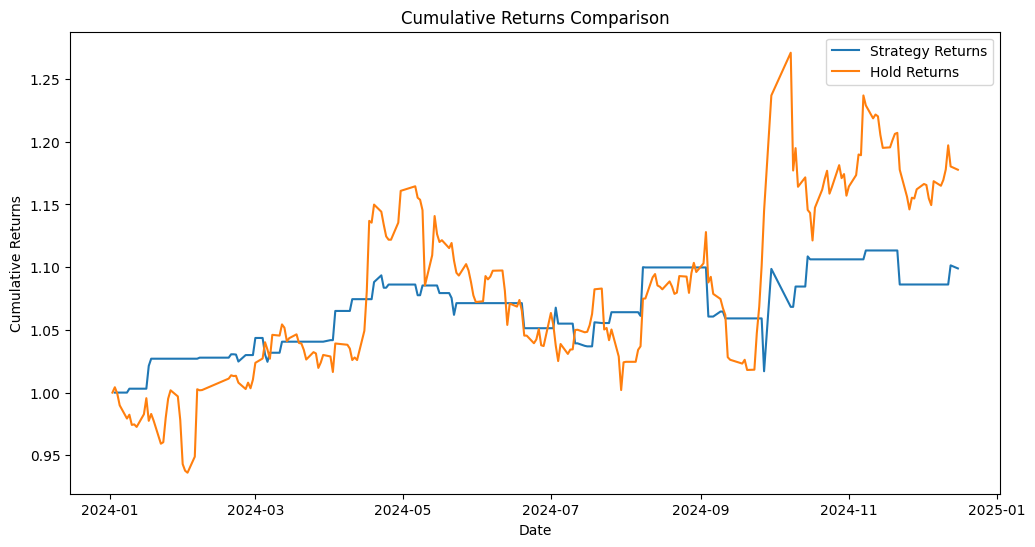

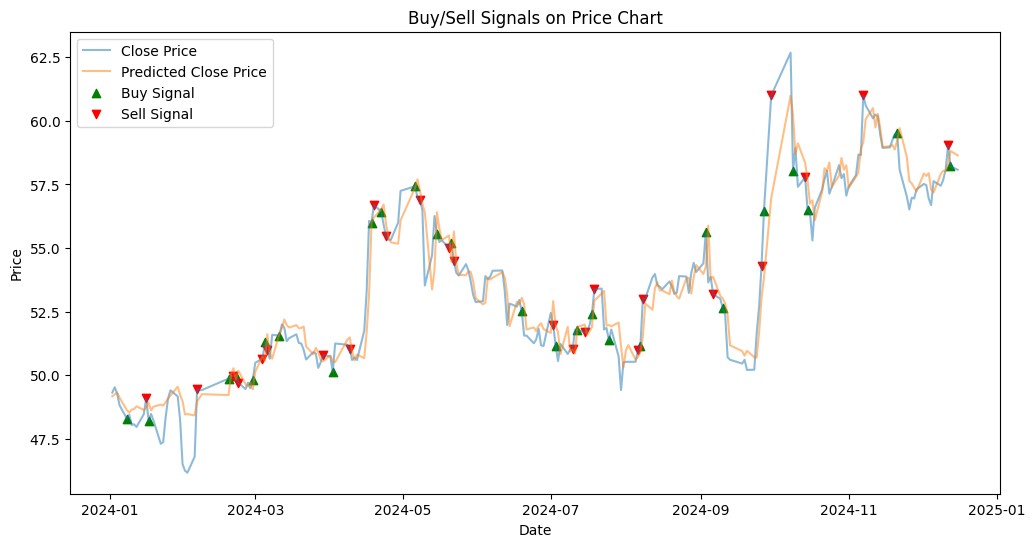

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算预测增长百分比
trade['Growth_Perc'] = (trade['Predicted_Clsprc'] - trade['Clsprc'].shift(1)) / trade['Clsprc'].shift(1)

# 初始化持仓状态列
trade['Position'] = 0  # 0 表示无持仓，1 表示持仓

# 生成买入和卖出信号
trade['Signal'] = 0
for i in range(1, trade.shape[0]):  # 从第二天开始，因为第一天没有前一天的持仓状态
    if trade['Growth_Perc'][i] > 0.003 and trade['Position'][i-1] == 0:
        trade['Signal'][i-1] = 1
        trade['Position'][i] = 1
    elif trade['Growth_Perc'][i] < -0 and trade['Position'][i-1] == 1:
        trade['Signal'][i-1] = -1
        trade['Position'][i] = 0
    else:
        trade['Position'][i] = trade['Position'][i-1]

trade.to_csv('茅台交易信号.csv', index=False)
# 计算策略收益
trade['Strategy_Return'] = trade['Signal'].shift(1) * trade['Clsprc'].pct_change()

# 计算累积收益
trade['Cumulative_Returns'] = (1 + trade['Strategy_Return']).cumprod()

# 计算全线持有策略的累积收益
trade['Buy_and_Hold'] = (trade['Clsprc'] / trade['Clsprc'].iloc[0])

# 绘制累积收益率图表
plt.figure(figsize=(12, 6))
plt.plot(trade['Cumulative_Returns'], label='Strategy Returns')
plt.plot(trade['Buy_and_Hold'], label='Hold Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Comparison')
plt.legend()
plt.show()

# 绘制买入卖出点的价格图表
plt.figure(figsize=(12, 6))
plt.plot(trade['Clsprc'], label='Close Price', alpha=0.5)
plt.plot(trade['Predicted_Clsprc'], label='Predicted Close Price', alpha=0.5)
buy_signals = trade.index[trade['Signal'] == 1]
sell_signals = trade.index[trade['Signal'] == -1]
plt.scatter(buy_signals, trade['Clsprc'][buy_signals], label='Buy Signal', marker='^', color='g', alpha=1)
plt.scatter(sell_signals, trade['Clsprc'][sell_signals], label='Sell Signal', marker='v', color='r', alpha=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Buy/Sell Signals on Price Chart')
plt.legend()
plt.show()

In [210]:
# 输出买卖点信息
trade_signals = pd.DataFrame()
trade_signals.index = trade.index
trade_signals = trade[trade['Signal'] != 0][['Clsprc', 'Signal']]
trade_signals['Action'] = trade_signals['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print("\n买卖点信息：")
print(trade_signals[['Action', 'Clsprc']])
trade_signals.to_csv('茅台交易信号.csv', index=True)

# 计算策略性能指标
total_return = trade['Cumulative_Returns'].iloc[-1] - 1
max_drawdown = ((trade['Cumulative_Returns'] / trade['Cumulative_Returns'].cummax()) - 1).min()

print(f"\n策略最终收益: {total_return * 100:.2f}%")
print(f"策略最大回撤: {max_drawdown * 100:.2f}%")


买卖点信息：
           Action  Clsprc
Trddt                    
2024-01-08    Buy   48.30
2024-01-16   Sell   49.10
2024-01-17    Buy   48.21
2024-02-06   Sell   49.45
2024-02-19    Buy   49.87
2024-02-21   Sell   49.97
2024-02-22    Buy   49.98
2024-02-23   Sell   49.71
2024-02-29    Buy   49.83
2024-03-04   Sell   50.66
2024-03-05    Buy   51.30
2024-03-06   Sell   51.01
2024-03-11    Buy   51.56
2024-03-29   Sell   50.80
2024-04-02    Buy   50.13
2024-04-09   Sell   51.05
2024-04-18    Buy   56.00
2024-04-19   Sell   56.71
2024-04-22    Buy   56.43
2024-04-24   Sell   55.46
2024-05-06    Buy   57.43
2024-05-08   Sell   56.90
2024-05-15    Buy   55.55
2024-05-20   Sell   55.00
2024-05-21    Buy   55.20
2024-05-22   Sell   54.51
2024-06-19    Buy   52.54
2024-07-02   Sell   51.98
2024-07-03    Buy   51.17
2024-07-10   Sell   51.02
2024-07-12    Buy   51.79
2024-07-15   Sell   51.69
2024-07-18    Buy   52.41
2024-07-19   Sell   53.38
2024-07-25    Buy   51.38
2024-08-06   Sell   51.00
2024

In [211]:
# 计算最终投资组合价值
final_portfolio_value = trade['Cumulative_Returns'].iloc[-1] * 100000  # 假设初始资金为 100,000
print("Final portfolio value: %.2f" % final_portfolio_value)

# 计算累积收益率
final_cumulative_return = (trade['Cumulative_Returns'].iloc[-1] - 1) * 100
print("Cumulative returns: %.2f %%" % final_cumulative_return)

# 计算夏普比率
risk_free_rate = 0.03 / 252  # 年化 3% 的无风险收益，按每日计算
excess_returns = trade['Strategy_Return'] - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)  # 252 为一年交易天数
print("Sharpe ratio: %.2f" % sharpe_ratio)

# 计算最大回撤
rolling_max = trade['Cumulative_Returns'].cummax()
drawdown = (trade['Cumulative_Returns'] / rolling_max) - 1
max_drawdown = drawdown.min()
print("Max. drawdown: %.2f %%" % (max_drawdown * 100))

# 计算最长回撤持续时间
drawdown_duration = (drawdown != 0).astype(int).groupby((drawdown == 0).astype(int).cumsum()).cumsum()
longest_drawdown_duration = drawdown_duration.max()
print("Longest drawdown duration: %d days" % longest_drawdown_duration)


Final portfolio value: 109896.26
Cumulative returns: 9.90 %
Sharpe ratio: 0.61
Max. drawdown: -7.54 %
Longest drawdown duration: 73 days


In [38]:
import numpy as np
import pandas as pd

C:\Users\86183\AppData\Local\Temp\ipykernel_20404\2458394152.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_maotai['Growth_Perc'].fillna(0, inplace=True)
C:\Users\86183\AppData\Local\Temp\ipykernel_20404\2458394152.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

            Moutai_Weight  Ningde_Weight  Yunnan_Weight  Portfolio_Return
Trddt                                                                    
2024-01-02       0.333333       0.333333       0.333333               NaN
2024-01-03       0.049375       0.896195       0.054430         -0.005391
2024-01-04       0.745663       0.012241       0.242096         -0.012588
2024-01-05       0.511291       0.253247       0.235461         -0.004428
2024-01-08       0.349976       0.182807       0.467217         -0.010142


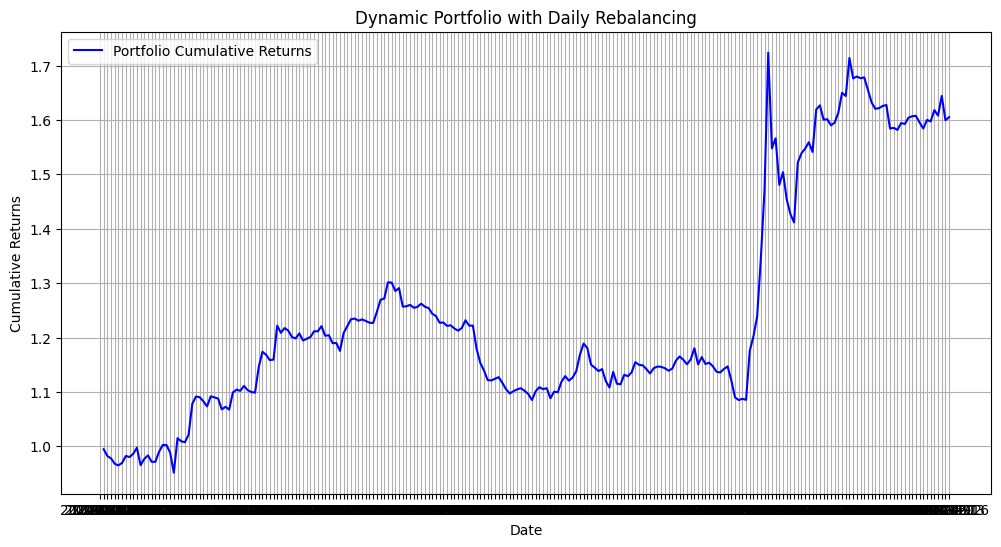

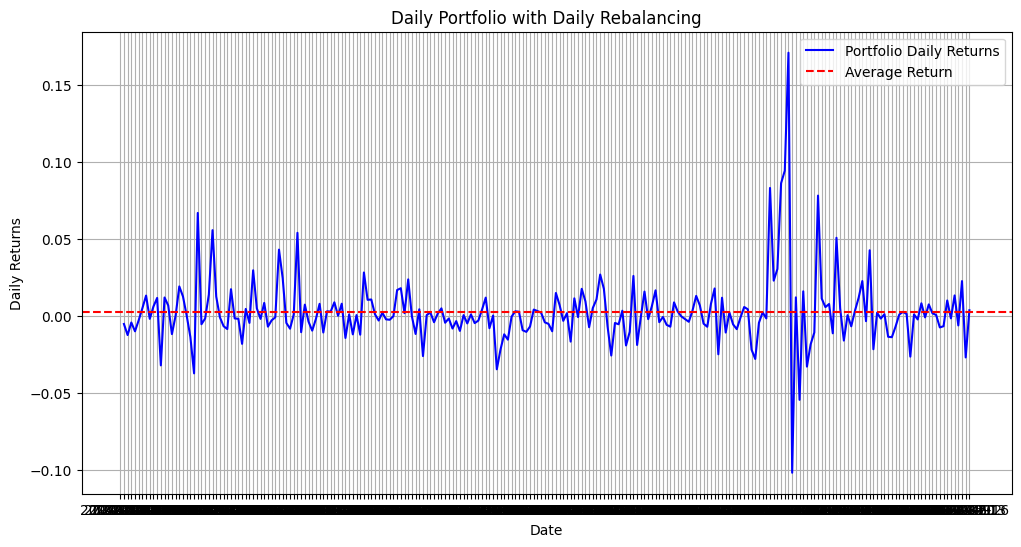

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_maotai = pd.read_csv('guizhoumaotai_trade.csv')
df_ningde = pd.read_csv('ningdeshidai_trade.csv')
df_yunnan = pd.read_csv('yunnanbaiyao_trade.csv')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设已加载数据并处理为 df_maotai, df_ningde, df_yunnan

# 计算每个资产的增长百分比
df_maotai['Growth_Perc'] = (df_maotai['Predicted_Clsprc'] - df_maotai['Clsprc'].shift(1)) / df_maotai['Clsprc'].shift(1)
df_ningde['Growth_Perc'] = (df_ningde['Predicted_Clsprc'] - df_ningde['Clsprc'].shift(1)) / df_ningde['Clsprc'].shift(1)
df_yunnan['Growth_Perc'] = (df_yunnan['Predicted_Clsprc'] - df_yunnan['Clsprc'].shift(1)) / df_yunnan['Clsprc'].shift(1)

df_maotai.set_index('Trddt', inplace=True)
df_ningde.set_index('Trddt', inplace=True)
df_yunnan.set_index('Trddt', inplace=True)


# 填充 NaN 值
df_maotai['Growth_Perc'].fillna(0, inplace=True)
df_ningde['Growth_Perc'].fillna(0, inplace=True)
df_yunnan['Growth_Perc'].fillna(0, inplace=True)

# 合并三个资产数据
df_portfolio = pd.DataFrame({
    'Trddt': df_maotai.index,
    'Moutai_Growth': df_maotai['Growth_Perc'],
    'Ningde_Growth': df_ningde['Growth_Perc'],
    'Yunnan_Growth': df_yunnan['Growth_Perc'],
    'Moutai_Return': df_maotai['Clsprc'].pct_change(),
    'Ningde_Return': df_ningde['Clsprc'].pct_change(),
    'Yunnan_Return': df_yunnan['Clsprc'].pct_change()
}).set_index('Trddt')

# Softmax 激活函数
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# 动态调仓逻辑
weights = []
portfolio_returns = []

for i, row in df_portfolio.iterrows():
    # 获取当日资产增长百分比
    growth = row[['Moutai_Growth', 'Ningde_Growth', 'Yunnan_Growth']].values * 100
    # 计算权重
    weight = softmax(growth)
    weights.append(weight)
    
    # 计算当日组合收益
    asset_returns = row[['Moutai_Return', 'Ningde_Return', 'Yunnan_Return']].values
    portfolio_return = np.dot(weight, asset_returns)
    portfolio_returns.append(portfolio_return)

# 将权重和组合收益存入 DataFrame
weights = np.array(weights)
df_portfolio['Moutai_Weight'] = weights[:, 0]
df_portfolio['Ningde_Weight'] = weights[:, 1]
df_portfolio['Yunnan_Weight'] = weights[:, 2]
df_portfolio['Portfolio_Return'] = portfolio_returns

# 计算组合的累积收益
df_portfolio['Cumulative_Returns'] = (1 + df_portfolio['Portfolio_Return']).cumprod()

# 输出每日权重和收益
print(df_portfolio[['Moutai_Weight', 'Ningde_Weight', 'Yunnan_Weight', 'Portfolio_Return']].head())

# 绘制累积收益曲线
plt.figure(figsize=(12, 6))
plt.plot(df_portfolio['Cumulative_Returns'], label='Portfolio Cumulative Returns', color='b')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Dynamic Portfolio with Daily Rebalancing')
plt.legend()
plt.grid()
plt.show()

# 计算每日收益的平均值
average_return = df_portfolio['Portfolio_Return'].mean()

# 绘制每日收益曲线和平均值直线
plt.figure(figsize=(12, 6))
plt.plot(df_portfolio['Portfolio_Return'], label='Portfolio Daily Returns', color='b')
plt.axhline(y=average_return, color='r', linestyle='--', label='Average Return')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Portfolio with Daily Rebalancing')
plt.legend()
plt.grid()
plt.show()




In [66]:
# 计算收益率指标
def calculate_performance(df_portfolio):
    # 总收益率
    total_return = df_portfolio['Cumulative_Returns'].iloc[-1] - 1
    
    # 年化收益率
    trading_days = len(df_portfolio)
    annualized_return = (1 + total_return) ** (252 / trading_days) - 1
    
    # 最大回撤和最长回撤天数
    rolling_max = df_portfolio['Cumulative_Returns'].cummax()
    drawdown = df_portfolio['Cumulative_Returns'] / rolling_max - 1
    max_drawdown = drawdown.min()  # 最小值即最大回撤
    drawdown_duration = (drawdown != 0).astype(int).groupby((drawdown == 0).astype(int).cumsum()).cumsum()
    max_drawdown_duration = drawdown_duration.max()
    
    # 夏普比率（假设无风险收益率为年化 3%）
    risk_free_rate = 0.03 / 252  # 无风险收益率的每日值
    excess_daily_returns = df_portfolio['Portfolio_Return'] - risk_free_rate
    sharpe_ratio = (excess_daily_returns.mean() / excess_daily_returns.std()) * np.sqrt(252)
    
    return {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Max Drawdown': max_drawdown,
        'Max Drawdown Duration': max_drawdown_duration,
        'Sharpe Ratio': sharpe_ratio
    }

# 调用函数计算指标
performance = calculate_performance(df_portfolio)

# 打印收益率及回撤指标
print(f"总收益率: {performance['Total Return'] * 100:.2f}%")
print(f"年化收益率: {performance['Annualized Return'] * 100:.2f}%")
print(f"最大回撤: {performance['Max Drawdown'] * 100:.2f}%")
print(f"最长回撤天数: {performance['Max Drawdown Duration']} 天")
print(f"夏普比率: {performance['Sharpe Ratio']:.2f}")


总收益率: 60.52%
年化收益率: 67.57%
最大回撤: -18.10%
最长回撤天数: 100 天
夏普比率: 1.53


In [68]:
df_portfolio[['Moutai_Weight', 'Ningde_Weight', 'Yunnan_Weight', 'Portfolio_Return']].to_csv('portfolio_return.csv')

print(df_portfolio.head(4).T)

Trddt               2024-01-02  2024-01-03  2024-01-04  2024-01-05
Moutai_Growth         0.000000    0.003173    0.011042    0.006260
Ningde_Growth         0.000000    0.032161   -0.030053   -0.000766
Yunnan_Growth         0.000000    0.004148   -0.000207   -0.001494
Moutai_Return              NaN    0.005335   -0.014758   -0.003379
Ningde_Return              NaN   -0.006568   -0.029525   -0.001984
Yunnan_Return              NaN    0.004258   -0.005047   -0.009334
Moutai_Weight         0.333333    0.049375    0.745663    0.511291
Ningde_Weight         0.333333    0.896195    0.012241    0.253247
Yunnan_Weight         0.333333    0.054430    0.242096    0.235461
Portfolio_Return           NaN   -0.005391   -0.012588   -0.004428
Cumulative_Returns         NaN    0.994609    0.982089    0.977740
